In [51]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape, Point
import matplotlib.pyplot as plt

# from shapely.geometry import shape, Point
# import pandas as pd
import json

be mindful of "-83.61155885,"

In [31]:
'''# grafana filtered (old sites removed)
df = pd.read_csv('Locations-grafana.csv')

df = df.dropna(subset=['Node ID'])
df = df[df['Node ID'].str.endswith('A')]

subset_df = pd.read_csv('Locations-HuronWatershed.csv')

# Step 2: Extract sensor IDs from subset_df
subset_sensor_ids = subset_df['Site ID'].tolist()  # Adjust 'sensor_id' based on your column name

# Step 3: Filter df to remove rows with sensor IDs present in subset_df
df = df[~df['Site ID'].isin(subset_sensor_ids)]

print(df.head())
print(df.tail())

df = df[(df['Latitude, Longitude'].notna()) & (df['Latitude, Longitude'] != '?')]

# Split the column containing "lat lon" into separate latitude and longitude columns
print(len(df['Latitude, Longitude']))

df[['lat', 'lon']] = df['Latitude, Longitude'].str.split(', ', expand=True)
# df[['lat', 'lon']] = df['Latitude, Longitude'].str.split(',', expand=True)
print(len(df['lat']))
print(len(df['lon']))
df = df.dropna(subset=['lon', 'lat'])
print(len(df['lat']))
print(len(df['lon']))
del df['Latitude, Longitude']

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
crs = {'init': 'epsg:4326'}  # assuming WGS84 coordinates
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)

# Convert to GeoJSON
output_geojson = 'Huron_sensors.geojson'
gdf.to_file(output_geojson, driver='GeoJSON')'''


'# grafana filtered (old sites removed)\ndf = pd.read_csv(\'Locations-grafana.csv\')\n\ndf = df.dropna(subset=[\'Node ID\'])\ndf = df[df[\'Node ID\'].str.endswith(\'A\')]\n\nsubset_df = pd.read_csv(\'Locations-HuronWatershed.csv\')\n\n# Step 2: Extract sensor IDs from subset_df\nsubset_sensor_ids = subset_df[\'Site ID\'].tolist()  # Adjust \'sensor_id\' based on your column name\n\n# Step 3: Filter df to remove rows with sensor IDs present in subset_df\ndf = df[~df[\'Site ID\'].isin(subset_sensor_ids)]\n\nprint(df.head())\nprint(df.tail())\n\ndf = df[(df[\'Latitude, Longitude\'].notna()) & (df[\'Latitude, Longitude\'] != \'?\')]\n\n# Split the column containing "lat lon" into separate latitude and longitude columns\nprint(len(df[\'Latitude, Longitude\']))\n\ndf[[\'lat\', \'lon\']] = df[\'Latitude, Longitude\'].str.split(\', \', expand=True)\n# df[[\'lat\', \'lon\']] = df[\'Latitude, Longitude\'].str.split(\',\', expand=True)\nprint(len(df[\'lat\']))\nprint(len(df[\'lon\']))\ndf = df.dr

In [32]:
# grafana csv only
'''
This section will take the csv from airtable and make it into a geojson to use in the next chunk
'''


# Read the CSV file

# df = pd.read_csv('Locations-HuronWatershed.csv')
'''
df = pd.read_csv('Locations-grafana.csv')

print(df.head())

df = df.dropna(subset=['Site ID'])
df = df[df['Site ID'].str.endswith('A')]

# Filter rows where 'Latitude, Longitude' is not empty and does not contain '?'
df = df[(df['Latitude, Longitude'].notna()) & (df['Latitude, Longitude'] != '?')]

# Split the column containing "lat lon" into separate latitude and longitude columns
print(len(df['Latitude, Longitude']))

# df[['lat', 'lon']] = df['Latitude, Longitude'].str.split(', ', expand=True)
df[['lat', 'lon']] = df['Latitude, Longitude'].str.split(',', expand=True)
print("look here")
print(len(df['lat']))
print(len(df['lon']))
# df = df.dropna(subset=['lon', 'lat'])
print("look here")
print(len(df['lat']))
print(len(df['lon']))
del df['Latitude, Longitude']

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
crs = {'init': 'epsg:4326'}  # assuming WGS84 coordinates
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)

# Convert to GeoJSON
output_geojson = 'Huron_sensors.geojson'
gdf.to_file(output_geojson, driver='GeoJSON')
'''


  Site ID                        Node ID  Distance from Node to Ground (mm)  \
0       0  007A,011A,005A,009A,072A,061A                                NaN   
1  111111                 049A,029A,012A                                NaN   
2  A2DWTP                            NaN                                NaN   
3  ARB001                            NaN                                0.0   
4  ARB002                           097A                             1562.1   

                                             Grafana  \
0                                                NaN   
1                                                NaN   
2  http://ec2-3-142-80-107.us-east-2.compute.amaz...   
3                                                NaN   
4  https://dash.digitalwaterlab.org:3000/d/yE7jC5...   

                                  Site Name Date Deployed        Project  \
0                       Unknown - Lost Node           NaN            NaN   
1               Postal - Being Shipp

/Users/shinapatel/anaconda3/envs/geo_env/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [52]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Locations-grafana.csv')

print(len(df['Latitude, Longitude']))

# Split 'Latitude, Longitude' into separate columns
df = df.dropna(subset=['Latitude, Longitude'])
print(len(df['Latitude, Longitude']))

df[['lat', 'lon']] = df['Latitude, Longitude'].str.split(', ', expand=True)
print(len(df['lat']))
print(len(df['lon']))

# Convert 'lat' and 'lon' to float, handling possible errors
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lon'] = pd.to_numeric(df['lon'], errors='coerce')

# Filter rows where Site ID starts with 'A' and drop rows with NaN longitude or latitude
df_filtered = df[df['Site ID'].str.startswith('A') & 
                 ~df['lon'].isna() &
                 ~df['lat'].isna()]

print(len(df['lat']))
print(len(df['lon']))

# Save the filtered DataFrame back to a CSV file
df_filtered.to_csv('filtered_sensor_data.csv', index=False)

# # Create a GeoDataFrame
# geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
# crs = {'init': 'epsg:4326'}  # assuming WGS84 coordinates
# gdf = gpd.GeoDataFrame(df_filtered, geometry=geometry, crs=crs)

# Create a GeoDataFrame for spatial operations
geometry = [Point(lon, lat) for lon, lat in zip(df_filtered['lon'], df_filtered['lat'])]
crs = {'init': 'epsg:4326'}  # assuming WGS84 coordinates
# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df_filtered, geometry=geometry, crs=crs)

# Convert to GeoJSON
output_geojson = 'Test_Huron_Watershed_Sensors.geojson'
gdf.to_file(output_geojson, driver='GeoJSON')

311
278
278
278
278
278


/Users/shinapatel/anaconda3/envs/geo_env/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [50]:
'''
# Read GeoJSON file into GeoDataFrame
file_path = 'Test_Huron_Watershed_Sensors.geojson'
gdf = gpd.read_file(file_path)

# Convert 'lat' and 'lon' columns to numeric (in case they are strings)
gdf['lat'] = pd.to_numeric(gdf['lat'])
gdf['lon'] = pd.to_numeric(gdf['lon'])

# Filter based on conditions
gdf = gdf[(gdf['lat'] <= 43) & (gdf['lon'] > -85)]

# Print the filtered GeoDataFrame (optional)
# print(filtered_gdf)

# Save the filtered GeoDataFrame back to GeoJSON (optional)
filtered_file_path = 'Test_Huron_Watershed_Sensors.geojson'
gdf.to_file(filtered_file_path, driver='GeoJSON')'''

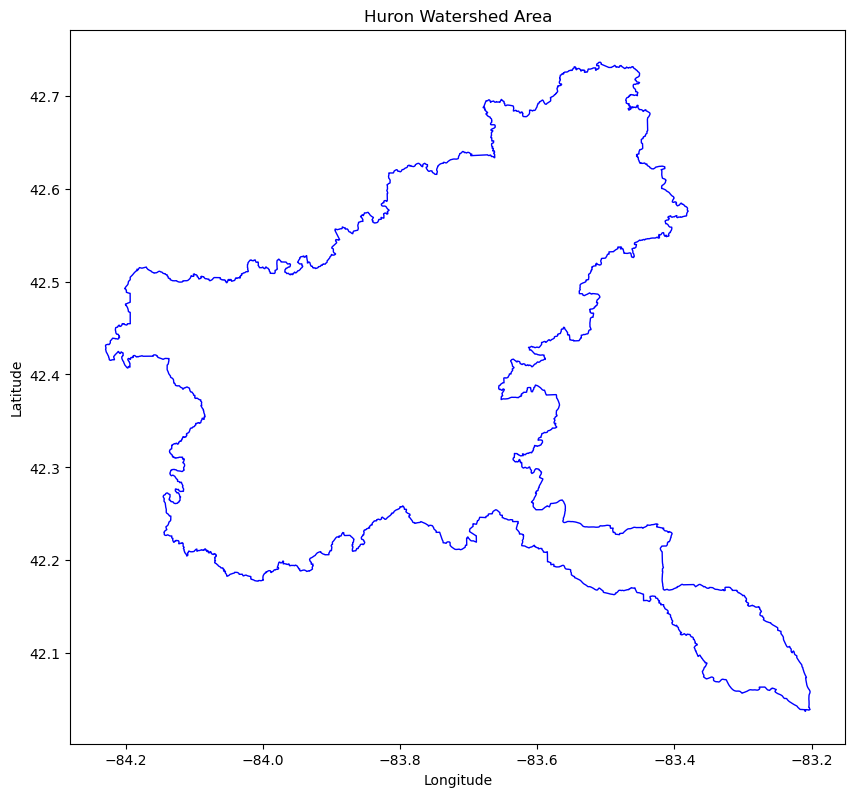

In [53]:
file_path = "Huron_Watershed.geojson"
gdf = gpd.read_file(file_path)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, facecolor='none', edgecolor='blue')  # Adjust colors as needed
ax.set_title('Huron Watershed Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Text(77.95625524543912, 0.5, 'Latitude')

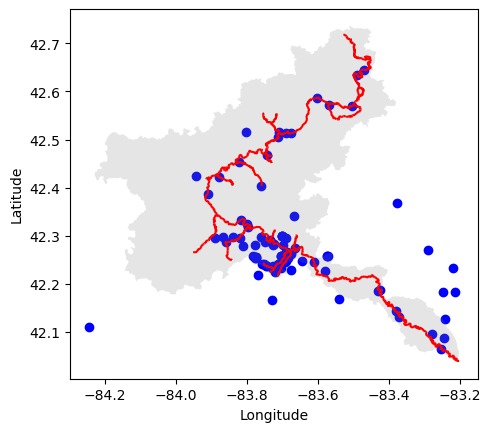

In [54]:
# Load GeoJSON files into GeoDataFrames
sensor_file = 'Test_Huron_Watershed_Sensors.geojson'
river_file = 'Huron_RiverSystem.geojson'
watershed_file = "Huron_Watershed.geojson"

sensor = gpd.read_file(sensor_file)
river = gpd.read_file(river_file)
watershed = gpd.read_file(watershed_file)

# Plot GeoDataFrames on the same plot
ax = sensor.plot(color='blue', label='DWL @ UM sensors')
river.plot(ax=ax, color='red', label='Rivers')
watershed.plot(ax=ax, color='gray', label='Watershed', alpha = 0.2)

# Add legends and labels
# ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')



In [36]:
df.to_csv('final_nodes.csv', index=False)
pd.set_option('display.max_rows', None)
print(df)

      Site ID Node ID  Distance from Node to Ground (mm) Grafana  \
178  GGB1425A    007E                                NaN     NaN   

                   Site Name Date Deployed Project  \
178  UM Realtime Systems Lab      8/8/2019     NaN   

    Node Type (from Devices (Phase 2))  \
178                                 WQ   

     dist. top of cantilever to bottom of cone (mm)  \
178                                             NaN   

                   Nearest Intersection  ... Partner      Contact Name  \
178  1351 Beal Ave, Ann Arbor, MI 48104  ...     NaN  Ernesto Martinez   

    sample frequency GPS Elevation (m) GPS Lat/ Long     County Bridge Key  \
178              NaN               NaN           NaN  Washtenaw        NaN   

    MDOT Regional Dashboard        lat          lon  
178                     NaN  42.293081   -83.712847  

[1 rows x 23 columns]


In [59]:

watershed_file = 'Huron_Watershed.geojson'
watershed_gdf = gpd.read_file(watershed_file)

# Step 2: Load sensor data from CSV
sensors_file = 'filtered_sensor_data.csv'
sensors_df = pd.read_csv(sensors_file)

# Step 3: Convert CSV data to GeoDataFrame
# Assuming your CSV has columns 'latitude' and 'longitude'
sensors_geometry = [Point(xy) for xy in zip(sensors_df.lon, sensors_df.lat)]
sensors_gdf = gpd.GeoDataFrame(sensors_df, crs='EPSG:4326', geometry=sensors_geometry)

# Step 4: Convert the Huron River watershed polygon to Shapely geometry
huron_watershed_polygon = shape(watershed_gdf.geometry.iloc[0])

# Step 5: Filter sensors that intersect with the Huron River watershed polygon
sensors_within_watershed = sensors_gdf[sensors_gdf.geometry.apply(lambda x: x.intersects(huron_watershed_polygon))]

# Step 6: Print or save the filtered sensors
print(sensors_within_watershed)
# Test_Huron_Watershed_Sensors
# Optionally, save the filtered sensors to a new CSV file
output_file = 'sensors_within_huron_watershed.geojson'
output_csv_file = 'sensors_within_huron_watershed.csv'
sensors_within_watershed.to_file(output_file, driver='GeoJSON')
sensors_within_watershed.to_csv(output_csv_file, index='False')

   Site ID Node ID  Distance from Node to Ground (mm)  \
0   A2DWTP     NaN                                NaN   
1   ARB001     NaN                             0.0000   
2   ARB002    097A                          1562.1000   
3   ARB003    094A                          1905.0000   
5   ARB005     NaN                             3.0000   
6   ARB006    048A                          2600.0000   
7   ARB007     NaN                             0.0000   
8   ARB008     NaN                             0.0000   
9   ARB009     NaN                          2562.2250   
10  ARB010     NaN                                NaN   
11  ARB011     NaN                          2286.0000   
12  ARB012    074A                          6858.0000   
13  ARB013    125A                          3048.0000   
14  ARB015    126A                          1930.0000   
15  ARB016     NaN                                NaN   
16  ARB017    003A                          1517.6500   
17  ARB018    083A             

In [91]:
# Step 1: Load sensor data from CSV or GeoJSON

sensors_file = 'filtered_sensor_data.csv'
sensors_df = pd.read_csv(sensors_file)

# Convert CSV data to GeoDataFrame assuming columns 'lon' and 'lat'
sensors_geometry = [Point(xy) for xy in zip(sensors_df.lon, sensors_df.lat)]
sensors_gdf = gpd.GeoDataFrame(sensors_df, crs='EPSG:4326', geometry=sensors_geometry)

# Step 2: Load river data from GeoJSON
river_file = 'Huron_RiverSystem.geojson'
river_gdf = gpd.read_file(river_file)

# Step 3: Buffer the river (assuming it's a line)
buffer_distance = 0.01  # Adjust as needed based on your data's CRS
river_gdf['geometry'] = river_gdf.geometry.buffer(buffer_distance)

# Step 4: Perform spatial join to find sensors near the river
sensors_near_river = gpd.sjoin(sensors_gdf, river_gdf, how='inner', predicate='intersects')

# Step 5: Save sensors_near_river as a new GeoJSON file
output_geojson = 'sensors_near_river.geojson'
sensors_near_river.to_file(output_geojson, driver='GeoJSON')

'''
# Step 5: Plot filtered sensors and river
ax = sensors_near_river.plot(color='blue', markersize=5, label='Sensors near river')
river_gdf.plot(ax=ax, color='red', alpha=0.5, label='Huron River')

# Add legends and labels
ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')'''

/var/folders/22/yp41wl3d2pd0d9b4zcdlnb380000gn/T/ipykernel_33103/885646239.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  river_gdf['geometry'] = river_gdf.geometry.buffer(buffer_distance)
/var/folders/22/yp41wl3d2pd0d9b4zcdlnb380000gn/T/ipykernel_33103/885646239.py:19: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  sensors_near_river = gpd.sjoin(sensors_gdf, river_gdf, how='inner', predicate='intersects')


"\n# Step 5: Plot filtered sensors and river\nax = sensors_near_river.plot(color='blue', markersize=5, label='Sensors near river')\nriver_gdf.plot(ax=ax, color='red', alpha=0.5, label='Huron River')\n\n# Add legends and labels\nax.legend()\nax.set_xlabel('Longitude')\nax.set_ylabel('Latitude')"

Text(81.14811467980415, 0.5, 'Latitude')

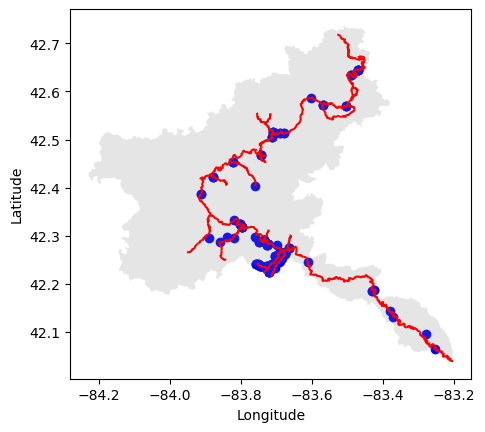

In [92]:
# Load GeoJSON files into GeoDataFrames
# sensor_file = 'sensors_within_huron_watershed.geojson'
sensor_file = 'sensors_near_river.geojson'
river_file = 'Huron_RiverSystem.geojson'
watershed_file = "Huron_Watershed.geojson"

sensor = gpd.read_file(sensor_file)
river = gpd.read_file(river_file)
watershed = gpd.read_file(watershed_file)

# Plot GeoDataFrames on the same plot
ax = sensor.plot(color='blue', label='DWL @ UM sensors')
river.plot(ax=ax, color='red', label='Rivers')
watershed.plot(ax=ax, color='gray', label='Watershed', alpha = 0.2)

# Add legends and labels
# ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')